In [106]:
from model import DenoisingUNet
from utils import *
from data import mask_dataset
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
from glob import glob
import torch.nn as nn
import torch
import numpy as np
sampleRate = 68.27

# Training on synthetic data

In [107]:
train_dataset = mask_dataset(data_path='synthetic-data/train', f_min=1, f_max=10, N_sub=11)
train_loader = DataLoader(train_dataset, batch_size=32, drop_last=True, shuffle=True)

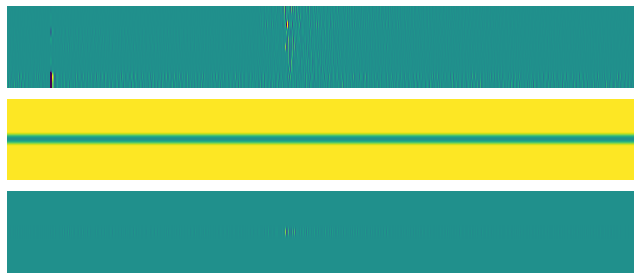

In [108]:
for eval,masks in train_loader:
    break
# Draw canvas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 4))

# Show sample (without blanking)
axes[0].imshow(eval[0, :, :, 0], aspect="auto", vmin=-1, vmax=1, origin="upper")
axes[0].axis("off")

# Show mask
axes[1].imshow(masks[0, :, :, 0], aspect="auto", vmin=-1, vmax=1, origin="upper")
axes[1].axis("off")

masked_sample = eval*(1-masks)
# Show prediction target
axes[2].imshow(masked_sample[0, :, :, 0], aspect="auto", vmin=-1, vmax=1, origin="upper")
axes[2].axis("off")

plt.tight_layout()
plt.show()

In [109]:
N_sub = 32
batch_size = 16
hidden_layers = 4
learning_rate = 1e-4
num_epochs = 100

In [110]:
# GPU
print(torch.cuda.get_device_name(0))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'device is {device}.')

model = DenoisingUNet(input_bands=1, output_classes=1, hidden_channels=hidden_layers)
model.to(device)

# Mean Square Error 
criterion = nn.MSELoss()

# Optimizer:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

NVIDIA GeForce RTX 2070
device is cuda:0.


In [111]:
epochs_losses_train = []
for epoch in range(num_epochs):
    print(f"Starting epoch: #{epoch}")
    batch_losses = []
    ## TRAIN ##
    for eval_samples, mask in tqdm(train_loader):
        eval_samples = eval_samples[:,:,32:]
        mask = mask[:,:,32:]
        # to GPU
        mask = mask.to(device)
        eval_samples = eval_samples.to(device)
        # apply mask
        sample = eval_samples * mask.clone().detach()
        sample = torch.unsqueeze(sample.squeeze(), 1)
        # complementary mask
        c_mask = (1-mask).squeeze()

        optimizer.zero_grad()
        # apply complementary mask to output (proj. operator)
        output = model(sample).squeeze()*c_mask
        truth = (eval_samples.squeeze()*c_mask).squeeze()
        loss = criterion(output.squeeze(), truth)
        batch_losses.append(loss.item())
        loss.backward()
        optimizer.step()
    epochs_losses_train.append(np.mean(batch_losses))
    print(f"Epoch: {epoch} Training Loss: {np.mean(batch_losses)}")

Starting epoch: #0


100%|██████████| 6/6 [00:00<00:00,  8.31it/s]


Epoch: 0 Training Loss: 0.09288561716675758
Starting epoch: #1


100%|██████████| 6/6 [00:00<00:00,  8.82it/s]


Epoch: 1 Training Loss: 0.09210485219955444
Starting epoch: #2


100%|██████████| 6/6 [00:00<00:00,  8.70it/s]


Epoch: 2 Training Loss: 0.09181320543090503
Starting epoch: #3


100%|██████████| 6/6 [00:00<00:00,  8.85it/s]


Epoch: 3 Training Loss: 0.09160130098462105
Starting epoch: #4


100%|██████████| 6/6 [00:00<00:00,  8.98it/s]


Epoch: 4 Training Loss: 0.09147097667058308
Starting epoch: #5


100%|██████████| 6/6 [00:00<00:00,  8.75it/s]


Epoch: 5 Training Loss: 0.09138453503449757
Starting epoch: #6


100%|██████████| 6/6 [00:00<00:00,  8.74it/s]


Epoch: 6 Training Loss: 0.0913032740354538
Starting epoch: #7


100%|██████████| 6/6 [00:00<00:00,  8.89it/s]


Epoch: 7 Training Loss: 0.09123912081122398
Starting epoch: #8


100%|██████████| 6/6 [00:00<00:00,  8.88it/s]


Epoch: 8 Training Loss: 0.09116412326693535
Starting epoch: #9


100%|██████████| 6/6 [00:00<00:00,  8.81it/s]


Epoch: 9 Training Loss: 0.09108383705218633
Starting epoch: #10


100%|██████████| 6/6 [00:00<00:00,  8.75it/s]


Epoch: 10 Training Loss: 0.09096023440361023
Starting epoch: #11


100%|██████████| 6/6 [00:00<00:00,  8.79it/s]


Epoch: 11 Training Loss: 0.09084723020593326
Starting epoch: #12


100%|██████████| 6/6 [00:00<00:00,  8.83it/s]


Epoch: 12 Training Loss: 0.09072314451138179
Starting epoch: #13


100%|██████████| 6/6 [00:00<00:00,  8.79it/s]


Epoch: 13 Training Loss: 0.09059750288724899
Starting epoch: #14


100%|██████████| 6/6 [00:00<00:00,  8.57it/s]


Epoch: 14 Training Loss: 0.09047451242804527
Starting epoch: #15


100%|██████████| 6/6 [00:00<00:00,  8.90it/s]


Epoch: 15 Training Loss: 0.09036791200439136
Starting epoch: #16


100%|██████████| 6/6 [00:00<00:00,  8.64it/s]


Epoch: 16 Training Loss: 0.09022962426145871
Starting epoch: #17


100%|██████████| 6/6 [00:00<00:00,  8.77it/s]


Epoch: 17 Training Loss: 0.09015276407202084
Starting epoch: #18


100%|██████████| 6/6 [00:00<00:00,  8.88it/s]


Epoch: 18 Training Loss: 0.09003179520368576
Starting epoch: #19


100%|██████████| 6/6 [00:00<00:00,  8.85it/s]


Epoch: 19 Training Loss: 0.08995915576815605
Starting epoch: #20


100%|██████████| 6/6 [00:00<00:00,  8.74it/s]


Epoch: 20 Training Loss: 0.08986971527338028
Starting epoch: #21


100%|██████████| 6/6 [00:00<00:00,  8.79it/s]


Epoch: 21 Training Loss: 0.08974806840221088
Starting epoch: #22


100%|██████████| 6/6 [00:00<00:00,  8.85it/s]


Epoch: 22 Training Loss: 0.08968230088551839
Starting epoch: #23


100%|██████████| 6/6 [00:00<00:00,  8.47it/s]


Epoch: 23 Training Loss: 0.08963668222228686
Starting epoch: #24


100%|██████████| 6/6 [00:00<00:00,  8.85it/s]


Epoch: 24 Training Loss: 0.08953707168499629
Starting epoch: #25


100%|██████████| 6/6 [00:00<00:00,  8.83it/s]


Epoch: 25 Training Loss: 0.08949130152662595
Starting epoch: #26


100%|██████████| 6/6 [00:00<00:00,  7.98it/s]


Epoch: 26 Training Loss: 0.08945872262120247
Starting epoch: #27


100%|██████████| 6/6 [00:00<00:00,  8.74it/s]


Epoch: 27 Training Loss: 0.08939448619882266
Starting epoch: #28


100%|██████████| 6/6 [00:00<00:00,  8.55it/s]


Epoch: 28 Training Loss: 0.08935152739286423
Starting epoch: #29


100%|██████████| 6/6 [00:00<00:00,  8.88it/s]


Epoch: 29 Training Loss: 0.08926460519433022
Starting epoch: #30


100%|██████████| 6/6 [00:00<00:00,  8.80it/s]


Epoch: 30 Training Loss: 0.08927826459209125
Starting epoch: #31


100%|██████████| 6/6 [00:00<00:00,  8.60it/s]


Epoch: 31 Training Loss: 0.08923522134621938
Starting epoch: #32


100%|██████████| 6/6 [00:00<00:00,  9.06it/s]


Epoch: 32 Training Loss: 0.08918889984488487
Starting epoch: #33


100%|██████████| 6/6 [00:00<00:00,  8.83it/s]


Epoch: 33 Training Loss: 0.08910025904575984
Starting epoch: #34


100%|██████████| 6/6 [00:00<00:00,  8.87it/s]


Epoch: 34 Training Loss: 0.08906383936603864
Starting epoch: #35


100%|██████████| 6/6 [00:00<00:00,  8.97it/s]


Epoch: 35 Training Loss: 0.08910606056451797
Starting epoch: #36


100%|██████████| 6/6 [00:00<00:00,  8.67it/s]


Epoch: 36 Training Loss: 0.08912137399117152
Starting epoch: #37


100%|██████████| 6/6 [00:00<00:00,  8.89it/s]


Epoch: 37 Training Loss: 0.08906146387259166
Starting epoch: #38


100%|██████████| 6/6 [00:00<00:00,  8.59it/s]


Epoch: 38 Training Loss: 0.0890185112754504
Starting epoch: #39


100%|██████████| 6/6 [00:00<00:00,  8.98it/s]


Epoch: 39 Training Loss: 0.0889207770427068
Starting epoch: #40


100%|██████████| 6/6 [00:00<00:00,  8.72it/s]


Epoch: 40 Training Loss: 0.08891320104400317
Starting epoch: #41


100%|██████████| 6/6 [00:00<00:00,  8.72it/s]


Epoch: 41 Training Loss: 0.08888726805647214
Starting epoch: #42


100%|██████████| 6/6 [00:00<00:00,  8.74it/s]


Epoch: 42 Training Loss: 0.08890295152862866
Starting epoch: #43


100%|██████████| 6/6 [00:00<00:00,  9.01it/s]


Epoch: 43 Training Loss: 0.08883836617072423
Starting epoch: #44


100%|██████████| 6/6 [00:00<00:00,  8.51it/s]


Epoch: 44 Training Loss: 0.08877270172039668
Starting epoch: #45


100%|██████████| 6/6 [00:00<00:00,  8.49it/s]


Epoch: 45 Training Loss: 0.08878921841581662
Starting epoch: #46


100%|██████████| 6/6 [00:00<00:00,  8.65it/s]


Epoch: 46 Training Loss: 0.08883420253793399
Starting epoch: #47


100%|██████████| 6/6 [00:00<00:00,  8.98it/s]


Epoch: 47 Training Loss: 0.08877990394830704
Starting epoch: #48


100%|██████████| 6/6 [00:00<00:00,  8.98it/s]


Epoch: 48 Training Loss: 0.08879087741176288
Starting epoch: #49


100%|██████████| 6/6 [00:00<00:00,  8.75it/s]


Epoch: 49 Training Loss: 0.08872587233781815
Starting epoch: #50


100%|██████████| 6/6 [00:00<00:00,  8.55it/s]


Epoch: 50 Training Loss: 0.08869320526719093
Starting epoch: #51


100%|██████████| 6/6 [00:00<00:00,  8.50it/s]


Epoch: 51 Training Loss: 0.08867572744687398
Starting epoch: #52


100%|██████████| 6/6 [00:00<00:00,  8.64it/s]


Epoch: 52 Training Loss: 0.08862968037525813
Starting epoch: #53


100%|██████████| 6/6 [00:00<00:00,  8.61it/s]


Epoch: 53 Training Loss: 0.08865847314397494
Starting epoch: #54


100%|██████████| 6/6 [00:00<00:00,  8.32it/s]


Epoch: 54 Training Loss: 0.08867901066939037
Starting epoch: #55


100%|██████████| 6/6 [00:00<00:00,  8.45it/s]


Epoch: 55 Training Loss: 0.08855476354559262
Starting epoch: #56


100%|██████████| 6/6 [00:00<00:00,  8.59it/s]


Epoch: 56 Training Loss: 0.08852322772145271
Starting epoch: #57


100%|██████████| 6/6 [00:00<00:00,  8.64it/s]


Epoch: 57 Training Loss: 0.08856003110607465
Starting epoch: #58


100%|██████████| 6/6 [00:00<00:00,  8.56it/s]


Epoch: 58 Training Loss: 0.08852287381887436
Starting epoch: #59


100%|██████████| 6/6 [00:00<00:00,  8.61it/s]


Epoch: 59 Training Loss: 0.08844060450792313
Starting epoch: #60


100%|██████████| 6/6 [00:00<00:00,  8.58it/s]


Epoch: 60 Training Loss: 0.08854715029398601
Starting epoch: #61


100%|██████████| 6/6 [00:00<00:00,  8.51it/s]


Epoch: 61 Training Loss: 0.08840531607468922
Starting epoch: #62


100%|██████████| 6/6 [00:00<00:00,  8.58it/s]


Epoch: 62 Training Loss: 0.08841569845875104
Starting epoch: #63


100%|██████████| 6/6 [00:00<00:00,  8.44it/s]


Epoch: 63 Training Loss: 0.0883652629951636
Starting epoch: #64


100%|██████████| 6/6 [00:00<00:00,  8.58it/s]


Epoch: 64 Training Loss: 0.08845592786868413
Starting epoch: #65


100%|██████████| 6/6 [00:00<00:00,  8.55it/s]


Epoch: 65 Training Loss: 0.08833801994721095
Starting epoch: #66


100%|██████████| 6/6 [00:00<00:00,  8.33it/s]


Epoch: 66 Training Loss: 0.08838256200154622
Starting epoch: #67


100%|██████████| 6/6 [00:00<00:00,  8.41it/s]


Epoch: 67 Training Loss: 0.08834249898791313
Starting epoch: #68


100%|██████████| 6/6 [00:00<00:00,  8.45it/s]


Epoch: 68 Training Loss: 0.08834691594044368
Starting epoch: #69


100%|██████████| 6/6 [00:00<00:00,  8.61it/s]


Epoch: 69 Training Loss: 0.08823690190911293
Starting epoch: #70


100%|██████████| 6/6 [00:00<00:00,  8.48it/s]


Epoch: 70 Training Loss: 0.08822458237409592
Starting epoch: #71


100%|██████████| 6/6 [00:00<00:00,  8.15it/s]


Epoch: 71 Training Loss: 0.08819600443045299
Starting epoch: #72


100%|██████████| 6/6 [00:00<00:00,  8.22it/s]


Epoch: 72 Training Loss: 0.08826941127578418
Starting epoch: #73


100%|██████████| 6/6 [00:00<00:00,  8.20it/s]


Epoch: 73 Training Loss: 0.08832763880491257
Starting epoch: #74


100%|██████████| 6/6 [00:00<00:00,  8.49it/s]


Epoch: 74 Training Loss: 0.0881761722266674
Starting epoch: #75


100%|██████████| 6/6 [00:00<00:00,  8.67it/s]


Epoch: 75 Training Loss: 0.08817023535569508
Starting epoch: #76


100%|██████████| 6/6 [00:00<00:00,  8.63it/s]


Epoch: 76 Training Loss: 0.08824410413702329
Starting epoch: #77


100%|██████████| 6/6 [00:00<00:00,  8.62it/s]


Epoch: 77 Training Loss: 0.08814843123157819
Starting epoch: #78


100%|██████████| 6/6 [00:00<00:00,  8.39it/s]


Epoch: 78 Training Loss: 0.08816175286968549
Starting epoch: #79


100%|██████████| 6/6 [00:00<00:00,  8.35it/s]


Epoch: 79 Training Loss: 0.08814701686302821
Starting epoch: #80


100%|██████████| 6/6 [00:00<00:00,  8.36it/s]


Epoch: 80 Training Loss: 0.08810277407368024
Starting epoch: #81


100%|██████████| 6/6 [00:00<00:00,  8.50it/s]


Epoch: 81 Training Loss: 0.08809299021959305
Starting epoch: #82


100%|██████████| 6/6 [00:00<00:00,  8.44it/s]


Epoch: 82 Training Loss: 0.08804589509963989
Starting epoch: #83


100%|██████████| 6/6 [00:00<00:00,  8.57it/s]


Epoch: 83 Training Loss: 0.08795263742407163
Starting epoch: #84


100%|██████████| 6/6 [00:00<00:00,  8.46it/s]


Epoch: 84 Training Loss: 0.08806442966063817
Starting epoch: #85


100%|██████████| 6/6 [00:00<00:00,  8.46it/s]


Epoch: 85 Training Loss: 0.08800554151336352
Starting epoch: #86


100%|██████████| 6/6 [00:00<00:00,  8.47it/s]


Epoch: 86 Training Loss: 0.08816316599647205
Starting epoch: #87


100%|██████████| 6/6 [00:00<00:00,  8.34it/s]


Epoch: 87 Training Loss: 0.0880817857881387
Starting epoch: #88


100%|██████████| 6/6 [00:00<00:00,  8.31it/s]


Epoch: 88 Training Loss: 0.08808280651768048
Starting epoch: #89


100%|██████████| 6/6 [00:00<00:00,  8.40it/s]


Epoch: 89 Training Loss: 0.08794747417171796
Starting epoch: #90


100%|██████████| 6/6 [00:00<00:00,  8.51it/s]


Epoch: 90 Training Loss: 0.0879184678196907
Starting epoch: #91


100%|██████████| 6/6 [00:00<00:00,  8.56it/s]


Epoch: 91 Training Loss: 0.08796463906764984
Starting epoch: #92


100%|██████████| 6/6 [00:00<00:00,  8.42it/s]


Epoch: 92 Training Loss: 0.08798395345608394
Starting epoch: #93


100%|██████████| 6/6 [00:00<00:00,  8.56it/s]


Epoch: 93 Training Loss: 0.08791562418142955
Starting epoch: #94


100%|██████████| 6/6 [00:00<00:00,  8.39it/s]


Epoch: 94 Training Loss: 0.08782422418395679
Starting epoch: #95


100%|██████████| 6/6 [00:00<00:00,  8.48it/s]


Epoch: 95 Training Loss: 0.0878024660050869
Starting epoch: #96


100%|██████████| 6/6 [00:00<00:00,  8.58it/s]


Epoch: 96 Training Loss: 0.08786285171906154
Starting epoch: #97


100%|██████████| 6/6 [00:00<00:00,  8.42it/s]


Epoch: 97 Training Loss: 0.08782090122501056
Starting epoch: #98


100%|██████████| 6/6 [00:00<00:00,  8.31it/s]


Epoch: 98 Training Loss: 0.08787644281983376
Starting epoch: #99


100%|██████████| 6/6 [00:00<00:00,  8.43it/s]

Epoch: 99 Training Loss: 0.08768296738465627


Text(0.5, 1.0, 'Train MSE')

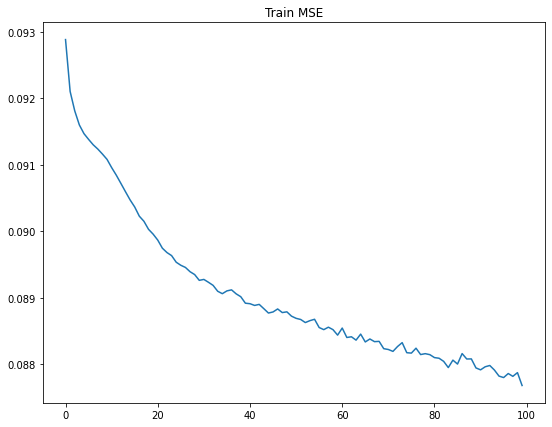

In [112]:
fig, ax1 = plt.subplots(1,1, figsize=(9, 7))
ax1.plot(epochs_losses_train)
ax1.set_title("Train MSE")

In [119]:
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss
}, "C:\\Users\\nikos\\Desktop\\denoising\\new_model_tests\\synthetic-train.pth")


# Testing on synthetic data

In [114]:
model.eval().to(torch.device('cpu'));

In [115]:
# Reconstruct just one file for now.
eval_sample = np.load('synthetic-data\\test\\waveforms-test.npy')[:,32:]
N_ch = eval_sample.shape[0]
N_t = eval_sample.shape[1]

""" Prepare samples and masks """
masks = np.ones((N_ch, N_sub, N_t))
eval_samples = np.zeros_like(masks)

gutter = N_sub // 2
mid = N_sub // 2

for i in range(gutter):
    masks[i, i] = 0
    eval_samples[i, :, :] = eval_sample[:N_sub]

for i in range(gutter, N_ch - gutter):
    start = i - mid
    stop = i + mid if N_sub % 2 == 0 else i + mid + 1

    masks[i, mid] = 0
    eval_samples[i, :, :] = eval_sample[start:stop]

for i in range(N_ch - gutter, N_ch):
    masks[i, i - N_ch] = 0
    eval_samples[i, :, :] = eval_sample[-N_sub:]

sample = eval_samples * masks
sample = torch.unsqueeze(torch.Tensor(sample).squeeze(), 1)
c_mask = (1-masks)
output = model(sample).detach().squeeze()*c_mask
output = output.sum(axis=1)


In [116]:
output_ = taper_filter(output, 1, 10, sampleRate)

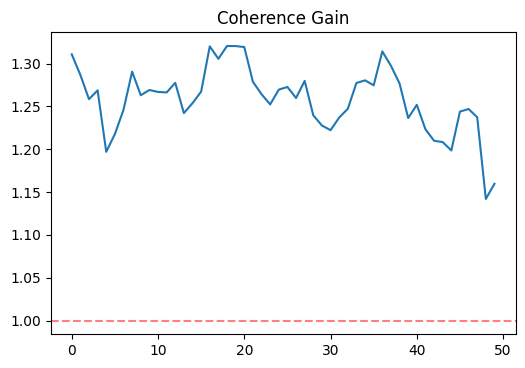

In [117]:
og = np.array(eval_sample)
rec = np.array(output_)
bin_size = 32
cc_og = compute_moving_coherence(og, bin_size)
cc_rec = compute_moving_coherence(rec, bin_size)
cc_gain = cc_rec / cc_og
plt.figure(dpi=100)
plt.plot(cc_gain)
plt.title("Coherence Gain")
plt.axhline(y=1,linestyle='--',alpha=0.5,color='r')

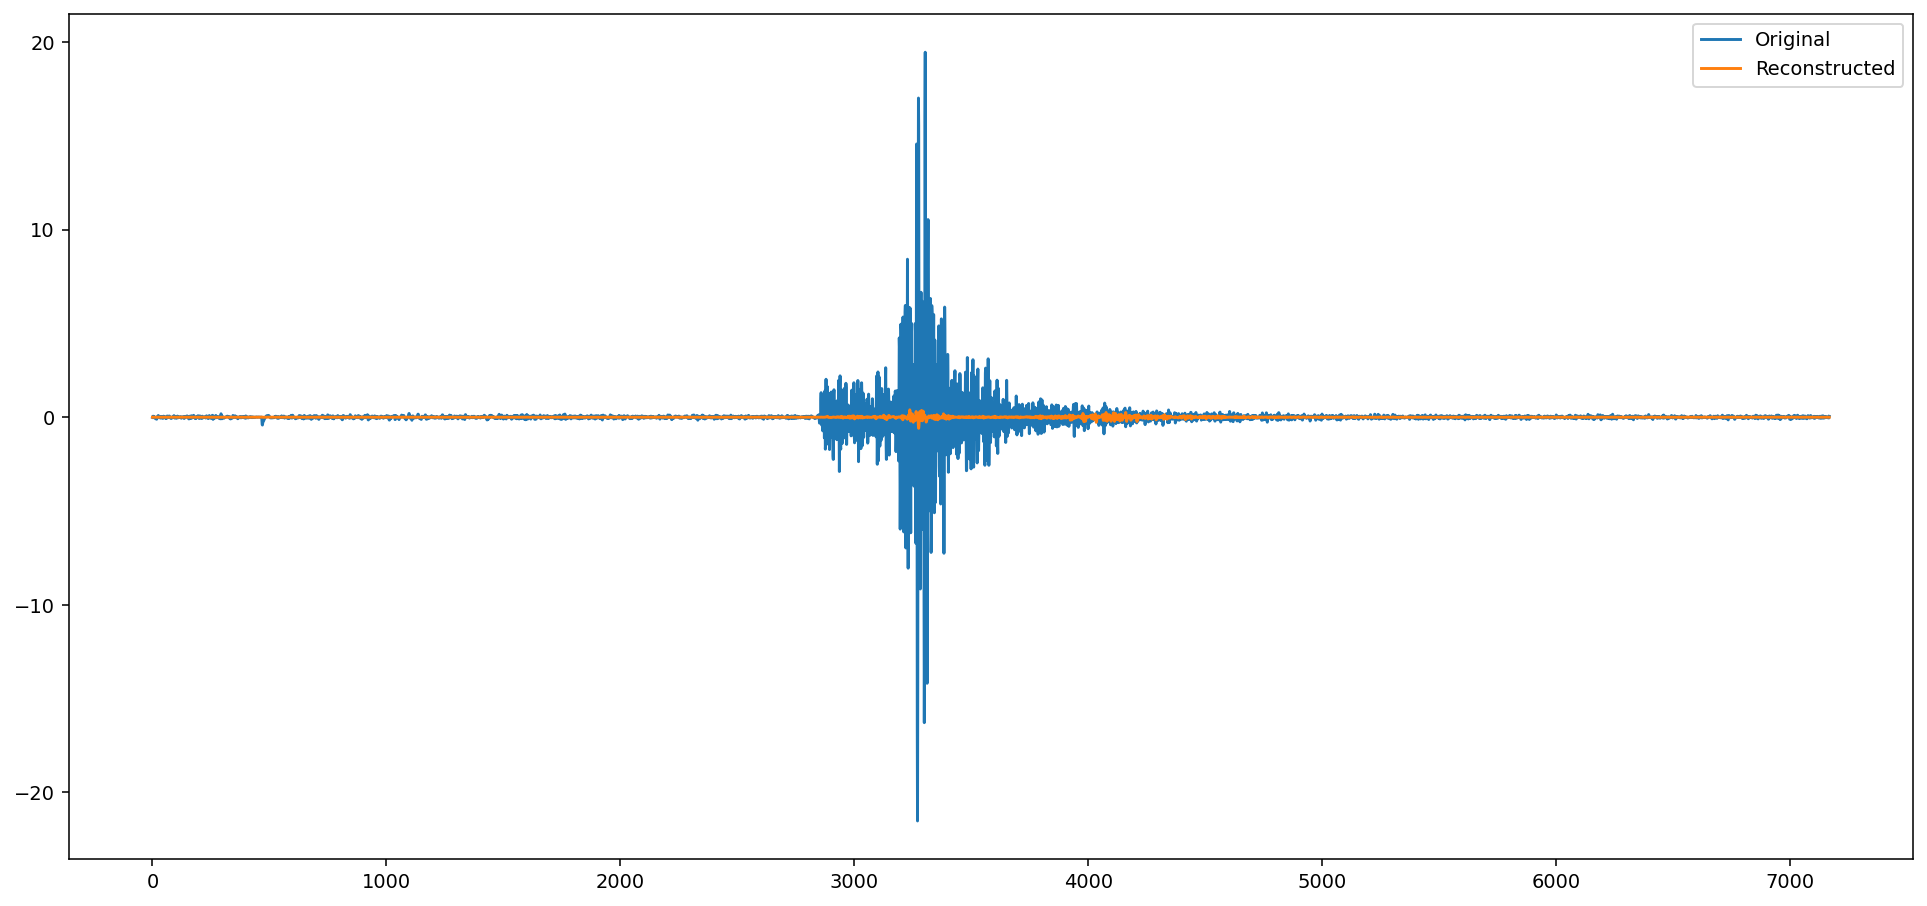

In [121]:
channel=10
plt.figure(figsize=(17,8),dpi=140)
plt.plot(eval_sample[channel],label='Original')
plt.plot(output_[channel],label='Reconstructed')
plt.legend()